**IUT d'Orléans - Année 2020-2021- 1A\
M2201 Graphes et Langages**

# TP2: Implémentation d'automate

Dans ce tp, nous allons utiliser NetworkX afin d'implémenter des automates ainsi que leur fonctionnement. Pour cela, nous allonc utiliser un nouveau type de graphes: les *graphes orientés*.

Un graphe orienté est très similaire à un graphe non orienté: il possède un ensemble de sommmets qui sont liés entre eux. Par contre, on associe une notion de *direction* à ces liens. On ne parle plus d'arête entre deux sommets mais d'un **arc** partant d'un sommet $u$ et terminant à un sommet $v$. Les notions de voisinages et de degré évoluent également:

- le voisinage sortant d'un sommet $u$ est l'ensemble des sommets pour lesquels il existe un arc partant de $u$ et arrivant à l'un de ces sommets. Le degré sortant est quand à lui défini comme le nombre d'arc tel que $u$ en soit l'origine.
- le voisinage entrant et le degré entrant sont définis similairement.

Dans un premier temps, nous allons voir comment créer et manipuler des graphes orientés avec NetworkX. Dans un second temps, nous allons représenter un automate avec un graphe orienté en utilisant NetworkX et nous allons implémenter un certain nombre d'opération sur cet automate.

# Créer un graphe orienté avec NetworkX

La méthode utilisée pour créer un graphe orienté est très similaire à celle utilisée pour créer un graphe non orienté:


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

D = nx.DiGraph()
print(D.nodes,D.edges)

[] []


Les méthodes pour ajouter des sommets ou des arcs sont identiques à celles utilisées pour les graphes non orientés. De même, l'accès aux différents éléments du graphe s'effectue de la même manière.

1. Ajoutez un ensemble de 4 sommets au graphe `D` dont les labels seront des entiers entre 0 et 3. Ajoutez un arc partant d'un sommet $i$ et arrivant à un sommet $j$ si $i<j$. Dessinez ensuite le graphe.

[0, 1, 2, 3] [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


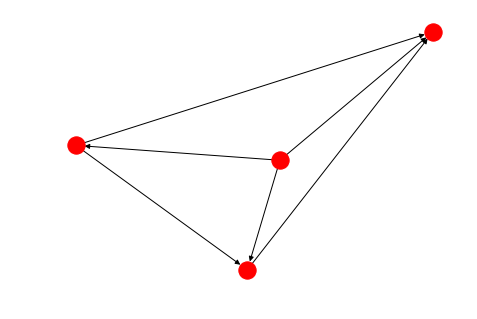

In [3]:
D = nx.DiGraph()
D.add_node(0)
D.add_node(1)
D.add_node(2)
D.add_node(3)
D.add_edge(0,1)
D.add_edge(0,2)
D.add_edge(0,3)
D.add_edge(1,2)
D.add_edge(2,3)
D.add_edge(1,3)
print(D.nodes,D.edges)
nx.draw(D)

2. Affichez le voisinage des sommets 0 et 3 grâce à D.adj. Que peut-on en déduire? Essayez maintenant d'exécuter list(D.adj[0]). Quelle différence constate-t-on?

In [4]:
D.adj
list(D.adj[0])

[1, 2, 3]

3. Un prédécesseur d'un sommet $u$ est un sommet tel que il existe un arc partant de ce sommet et arrivant à $u$. Ecrivez une fonction `predecesseurs` qui prend en paramètre un graphe orienté et un sommet et qui renvoie les labels des prédécesseurs de ce sommet dans le graphe.

In [5]:
def predecesseurs(graphe,sommet):
    res=[]
    for a in graphe.nodes:
        if a in list(D.adj[sommet]):
            res.append(a)
    return res
print(predecesseurs(D,0))

[1, 2, 3]


**Remarque:** Il est possible d'accéder directement aux prédécesseurs grâce à `D.pred`, mais pour l'exercice précédant on ne s'autorise l'utilisation de cet objet.

## Ajouter des attributs

Il est également possible d'associer à un arc un ou des attributs. L'ensemble de ces attributs fonctionne comme un dictionnaire Python. On distingue deux méthodes pour ajouter un attribut à un arc:

- soit le faire à la création d'un arc: `D.add_edge(u,v,attr=valeur)` pour ajouter un attribut `attr` de valeur `valeur`
- soit après la création de l'arc: `D.edges[u,v]["attribut"]=valeur`

1. Ajoutez un poids sur chaque arc du graphe crée précédemment avec pour valeur la moyenne des labels des extrémités de l'arc. Ex: l'arc entre 1 et 3 aura un poids de 2. Affichez les arcs du graphe avec leur poids. Pour cela, on pourra s'aider de `D.edges(data=attr)`.

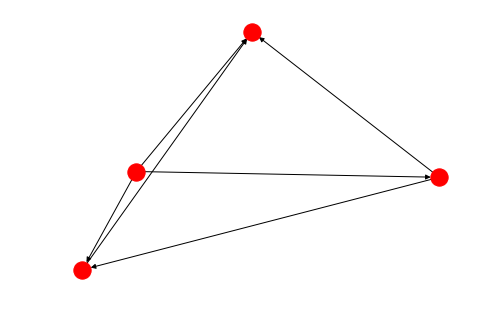

In [6]:
D.edges[0,1]["poids"]=0.5
D.edges[1,3]["poids"]=2
D.edges[0,2]["poids"]=1
D.edges[0,3]["poids"]=1.5
D.edges[1,2]["poids"]=1.5
D.edges[2,3]["poids"]=2.5
D.edges(data="poids")
nx.draw(D)

Il est également possible de rajouter des attributs au graphe, grâce à D.graph, qui fonctionne comme un dictionnaire.

1. Rajoutez un attribut 'nom' au graphe auquel vous associerez le nom 'premier_digraph'.

In [7]:
D.graph["nom"]="premier_digraph"

## Représentation d'un automate

Pour rappel, un automate est composé d'un ensemble d'états, dont certains sont des états particuliers (initial ou acceptants) ainsi qu'un ensemble de transitions étiquettées par une lettre appartenant à un alphabet. Une transition possède un état de départ et un état d'arrivée (qui peuvent être confondus).

On peut donc voir un automate comme un graphe orienté où les sommets représenteraient les états et les arcs les transitions. Les étiquettes des transitions peuvent facilement être implémentées en utilisant les attributs des arcs. 

**Hypothèse:** Nous considérerons qu'une transition est associée à une seule lettre.

On considère l'automate suivant:

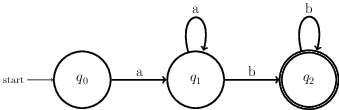

1. Créez un graphe avec NetworkX représentant cet automate. Nous ajouterons à ce graphe des attributs représentant l'état initial et les états acceptants.

AdjacencyView({'start': {'q0': {}}, 'q0': {'q1': {'attribut': 'a'}}, 'q1': {'q1': {'attribut': 'a'}, 'q2': {'attribut': 'b'}}, 'q2': {'q2': {'attribut': 'b'}}})

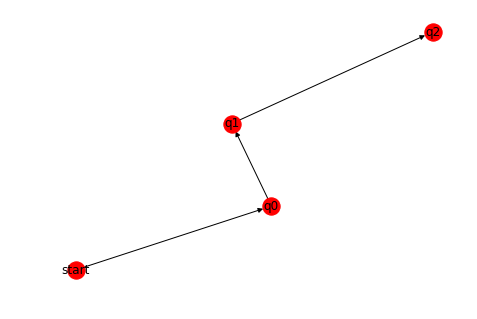

In [8]:
G= nx.DiGraph()
G.add_edge("start","q0")
G.add_edge("q0","q1")
G.add_edge("q1","q1")
G.add_edge("q1","q2")
G.add_edge("q2","q2")
G.edges["q0","q1"]["attribut"]="a"
G.edges["q1","q1"]["attribut"]="a"
G.edges["q1","q2"]["attribut"]="b"
G.edges["q2","q2"]["attribut"]="b"
G.graph["initial"]=["q0"]
G.graph["acceptants"]=["q2"]
nx.draw(G, with_labels =True)
G.edges(data="attribut")
G.adj

## Premières fonctionnalités

**Hypothèse:** Dans tout ce qui suit, on supposera qu'il existe au plus une transition pour une lettre donnée.

1. Écrivez une fonction qui prend en entrée un automate et renvoie l’état de départ de cet automate. Faire de même pour les états acceptants.

In [9]:
def etat(automate):
    return automate.graph["initial"]
print(etat(G))

def etat2(automate):
    return automate.graph["acceptants"]
print(etat2(G))

['q0']
['q2']


2. Écrivez une fonction qui prend en entrée un automate et un état et renvoie l’ensemble des états accessibles à partir de cet état en une seule transition.

In [16]:
def etat_accesible(automate,etat):
    return list(automate.adj[etat])
print(etat_accesible(G,"q0"))

['q1']


3. Écrivez une fonction qui prend en entrée un automate, un état x et un état y et renvoie l’ensemble des symboles qui permettent d’aller de x à y si y est un voisin de x et l’ensemble vide sinon.

In [20]:
def etat_symboles(automate,x,y):
    res=[]
    for u, v, symbole in automate.edges(data="attribut"):
        if (u,v)==(x,y):
            res.append(symbole)
    return res
print(etat_symboles(G,"q1","q2"))

['b']


## Reconnaissance d'un mot

Nous allons maintenant nous attaquer à implémenter la reconnaissance d'un mot par un automate. 

**Hypothèse:** Pour simplifier la conception, on suposera également que pour tout symbole $s$ et tout état $q$, il existe une transition partant de $q$ et étiquetée par $s$.

1. Écrivez une fonction qui prend en entrée un automate, un état et un symbole et qui renvoie l’état dans lequel on doit se trouver après lecture de ce symbole.

In [23]:
def etat_apres_lecture(automate,etat,symbole):
    for u, a in automate.adj[etat].items():
        if a["attribut"]==symbole:
            return u
print(etat_apres_lecture(G,"q1","b"))

q2


2. Écrivez une fonction qui prend en entrée un automate et un mot et renvoie l’état dans lequel on se trouve après lecture du mot par l’automate.

In [25]:
def je_sais_pas(automate,mot):
    b="q0"
    for a  in range(len(mot)):
        b=etat_apres_lecture(automate,b,mot[a])
    return b
print(je_sais_pas(G,"ab"))

q2


3. Écrivez une fonction qui prend en entrée un automate et un mot et renvoie vrai si le mot est reconnu par l’automate et faux sinon.

In [36]:
def mot(automate,mot):
    return je_sais_pas(automate,mot) in automate.graph["acceptants"]
print(mot(G,"ab"))

True


## Pour aller un peu plus loin

Modifier le code précédent afin de pouvoir gérer la reconnaissance de mots sans certaines hypothèses que nous avons faites. Par exemple, on pourra supposer qu'il n'existe pas forcément de transition pour chaque symbole partant d'un état. On pourra aussi considérer plus états initiaux possibles.